In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

## Load the dataset

In [ ]:
data=pd.read_excel('/content/database GMAM.xlsx')
data

,Date,PrixArgent,Prix Or,Prix Pétrole brut,Prix Gaz naturel,Prix Blé,Prix Café Robusta,Prix Café Arabica,Réserve extérieur,Taux de chomage,Production Industrielle,Export,Import,Indice des prix à la consommation,revenu personnel,Dépenses de consommation personnelle,Downjones,NASDAQ,S&P 500,EUR/USD
0,2016-11-15,786.38,476.67,54.98,10.30,161.12,54.72,108.81,68773,5.0,100.9014,107.6,112.3,198.100,10878.1,8987.689,10805.87,2232.82,1249.479980,1.179441
1,2016-12-15,868.74,510.1,56.47,13.05,164.44,59.01,103.03,65127,4.9,101.4873,107.7,112.3,198.100,10939.9,9026.766,10717.50,2205.32,1248.290039,1.186395
2,2017-01-15,918.48,549.86,62.36,8.69,167.16,66.45,124.36,65594,4.7,101.6088,108.5,113.7,199.300,11154.6,9100.107,10864.86,2305.82,1280.079956,1.211845
3,2017-02-15,952.13,555,59.71,7.53,179.84,65.46,118.52,65364,4.8,101.6839,108.6,112.8,199.400,11216.5,9134.653,10993.41,2281.39,1280.660034,1.194210
4,2017-03-15,1 037.52,557.09,60.93,6.88,174.44,62.92,112.20,65354,4.7,101.8522,108.8,112.7,199.700,11263.0,9168.089,11109.32,2339.79,1294.869995,1.203257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2023-08-15,2 189.39,1 351.74,108.06,3.43,305.49,100.73,135.63,145755,7.3,101.9928,131.9,139.4,233.249,14137.4,11370.236,14810.31,3589.87,1632.969971,1.331714
94,2023-09-15,2 256.38,1 348.60,108.78,3.62,307.51,93.48,132.78,147747,7.3,102.4847,132.4,139.8,233.642,14188.9,11423.949,15129.67,3771.48,1681.550049,1.336076
95,2023-10-15,2 191.70,1 316.58,105.46,3.67,325.07,90.01,128.83,147086,7.2,102.4287,131.6,138.9,233.799,14176.3,11465.233,15545.75,3919.71,1756.540039,1.363757
96,2023-11-15,2 075.76,1 275.86,102.58,3.62,306.75,85.67,122.75,145112,6.9,102.7732,131.8,137.7,234.210,14243.8,11541.950,16086.41,4059.89,1805.810059,1.349576


## Data Preparation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  98 non-null     datetime64[ns]
 1   PrixArgent                            98 non-null     object        
 2   Prix Or                               98 non-null     object        
 3   Prix Pétrole brut                     98 non-null     float64       
 4   Prix Gaz naturel                      98 non-null     float64       
 5   Prix Blé                              98 non-null     float64       
 6   Prix Café Robusta                     98 non-null     float64       
 7   Prix Café Arabica                     98 non-null     float64       
 8   Réserve extérieur                     98 non-null     int64         
 9   Taux de chomage                       98 non-null     float64       
 10  Prod

In [ ]:
data.columns

Index(['Date', 'PrixArgent', 'Prix Or', 'Prix Pétrole brut',
       'Prix Gaz naturel ', 'Prix Blé ', 'Prix Café Robusta',
       'Prix Café Arabica ', 'Réserve extérieur', 'Taux de chomage',
       'Production Industrielle', 'Export ', 'Import ',
       'Indice des prix à la consommation', ' revenu personnel',
       'Dépenses de consommation personnelle', 'Downjones', 'NASDAQ',
       'S&P 500', 'EUR/USD'],
      dtype='object')

In [ ]:
data['Pouvoir d\'achat'] = data[' revenu personnel'] / data['Indice des prix à la consommation']
data

,Date,PrixArgent,Prix Or,Prix Pétrole brut,Prix Gaz naturel,Prix Blé,Prix Café Robusta,Prix Café Arabica,Réserve extérieur,Taux de chomage,...,Export,Import,Indice des prix à la consommation,revenu personnel,Dépenses de consommation personnelle,Downjones,NASDAQ,S&P 500,EUR/USD,Pouvoir d'achat
0,2016-11-15,786.38,476.67,54.98,10.30,161.12,54.72,108.81,68773,5.0,...,107.6,112.3,198.100,10878.1,8987.689,10805.87,2232.82,1249.479980,1.179441,54.912166
1,2016-12-15,868.74,510.1,56.47,13.05,164.44,59.01,103.03,65127,4.9,...,107.7,112.3,198.100,10939.9,9026.766,10717.50,2205.32,1248.290039,1.186395,55.224129
2,2017-01-15,918.48,549.86,62.36,8.69,167.16,66.45,124.36,65594,4.7,...,108.5,113.7,199.300,11154.6,9100.107,10864.86,2305.82,1280.079956,1.211845,55.968891
3,2017-02-15,952.13,555,59.71,7.53,179.84,65.46,118.52,65364,4.8,...,108.6,112.8,199.400,11216.5,9134.653,10993.41,2281.39,1280.660034,1.194210,56.251254
4,2017-03-15,1 037.52,557.09,60.93,6.88,174.44,62.92,112.20,65354,4.7,...,108.8,112.7,199.700,11263.0,9168.089,11109.32,2339.79,1294.869995,1.203257,56.399599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2023-08-15,2 189.39,1 351.74,108.06,3.43,305.49,100.73,135.63,145755,7.3,...,131.9,139.4,233.249,14137.4,11370.236,14810.31,3589.87,1632.969971,1.331714,60.610764
94,2023-09-15,2 256.38,1 348.60,108.78,3.62,307.51,93.48,132.78,147747,7.3,...,132.4,139.8,233.642,14188.9,11423.949,15129.67,3771.48,1681.550049,1.336076,60.729235
95,2023-10-15,2 191.70,1 316.58,105.46,3.67,325.07,90.01,128.83,147086,7.2,...,131.6,138.9,233.799,14176.3,11465.233,15545.75,3919.71,1756.540039,1.363757,60.634562
96,2023-11-15,2 075.76,1 275.86,102.58,3.62,306.75,85.67,122.75,145112,6.9,...,131.8,137.7,234.210,14243.8,11541.950,16086.41,4059.89,1805.810059,1.349576,60.816361


In [ ]:
features = ['PrixArgent', 'Prix Or', 'Prix Pétrole brut',
            'Prix Gaz naturel ', 'Prix Blé ', 'Prix Café Robusta',
            'Prix Café Arabica ','Production Industrielle','Dépenses de consommation personnelle',
            'Downjones', 'NASDAQ', 'S&P 500', 'EUR/USD']
target = 'Pouvoir d\'achat'
for feature in features:
    for index, value in data[feature].items():
        try:
            float(value)
        except ValueError:
            cleaned_value = str(value).replace('\xa0', '').replace(',', '.')
            try:
                data.loc[index, feature] = float(cleaned_value)
                print(f"Transformed element in column '{feature}', index {index}: {value} -> {cleaned_value}")
            except ValueError:
                print(f"Could not transform element in column '{feature}', index {index}: {value}")


Transformed element in column 'PrixArgent', index 4: 1 037.52 -> 1037.52
Transformed element in column 'PrixArgent', index 5: 1 263.16 -> 1263.16
Transformed element in column 'PrixArgent', index 6: 1 337.84 -> 1337.84
Transformed element in column 'PrixArgent', index 7: 1 077.41 -> 1077.41
Transformed element in column 'PrixArgent', index 8: 1 121.24 -> 1121.24
Transformed element in column 'PrixArgent', index 9: 1 225.39 -> 1225.39
Transformed element in column 'PrixArgent', index 10: 1 159.93 -> 1159.93
Transformed element in column 'PrixArgent', index 11: 1 161.55 -> 1161.55
Transformed element in column 'PrixArgent', index 12: 1 298.45 -> 1298.45
Transformed element in column 'PrixArgent', index 13: 1 329.83 -> 1329.83
Transformed element in column 'PrixArgent', index 14: 1 286.63 -> 1286.63
Transformed element in column 'PrixArgent', index 15: 1 394.58 -> 1394.58
Transformed element in column 'PrixArgent', index 16: 1 316.27 -> 1316.27
Transformed element in column 'PrixArgent', 

In [ ]:
X = data[features].astype(float)
y = data[target].astype(float)

In [ ]:
print(data[feature].dtypes)

float64


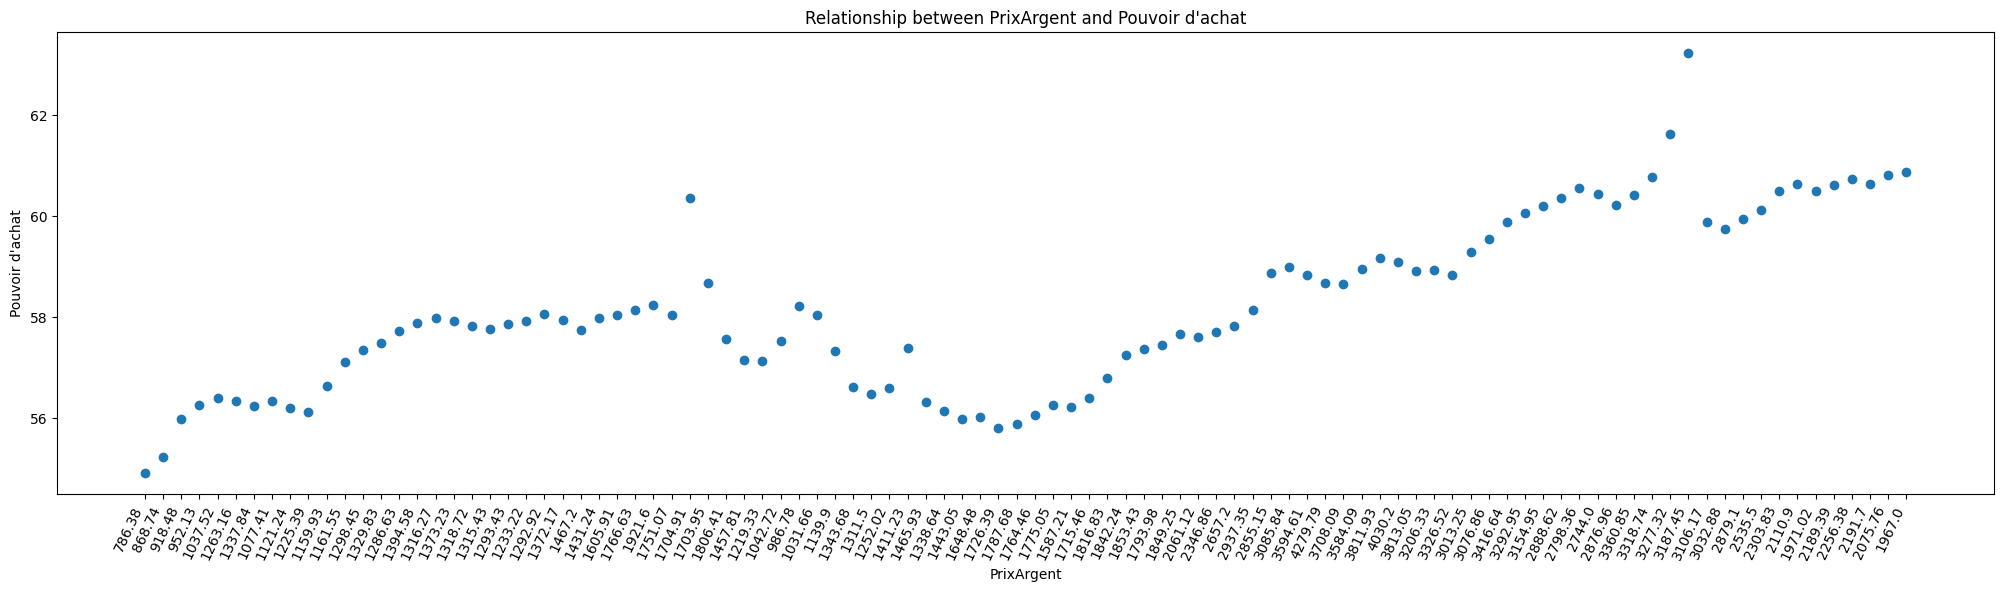

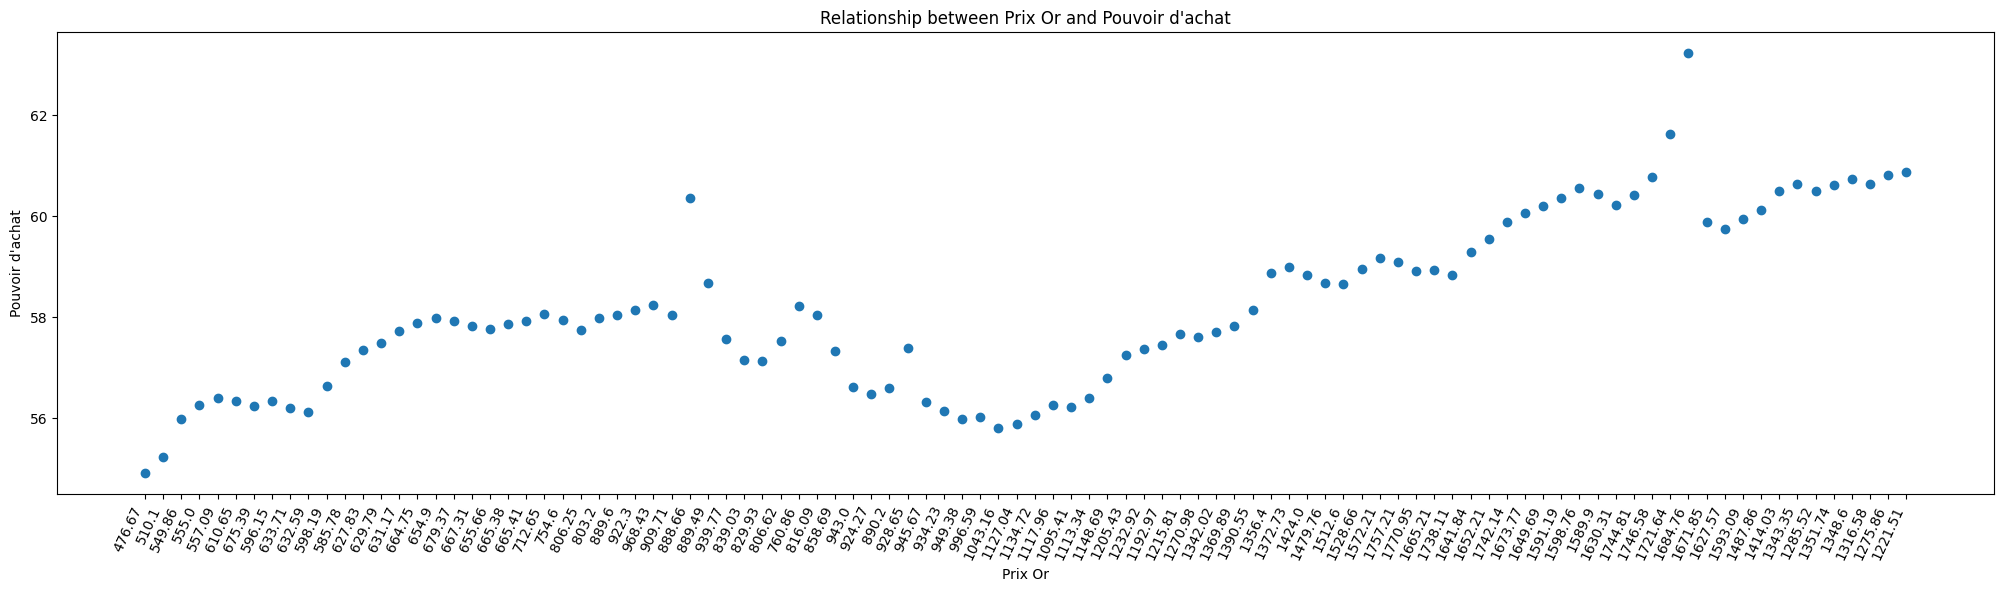

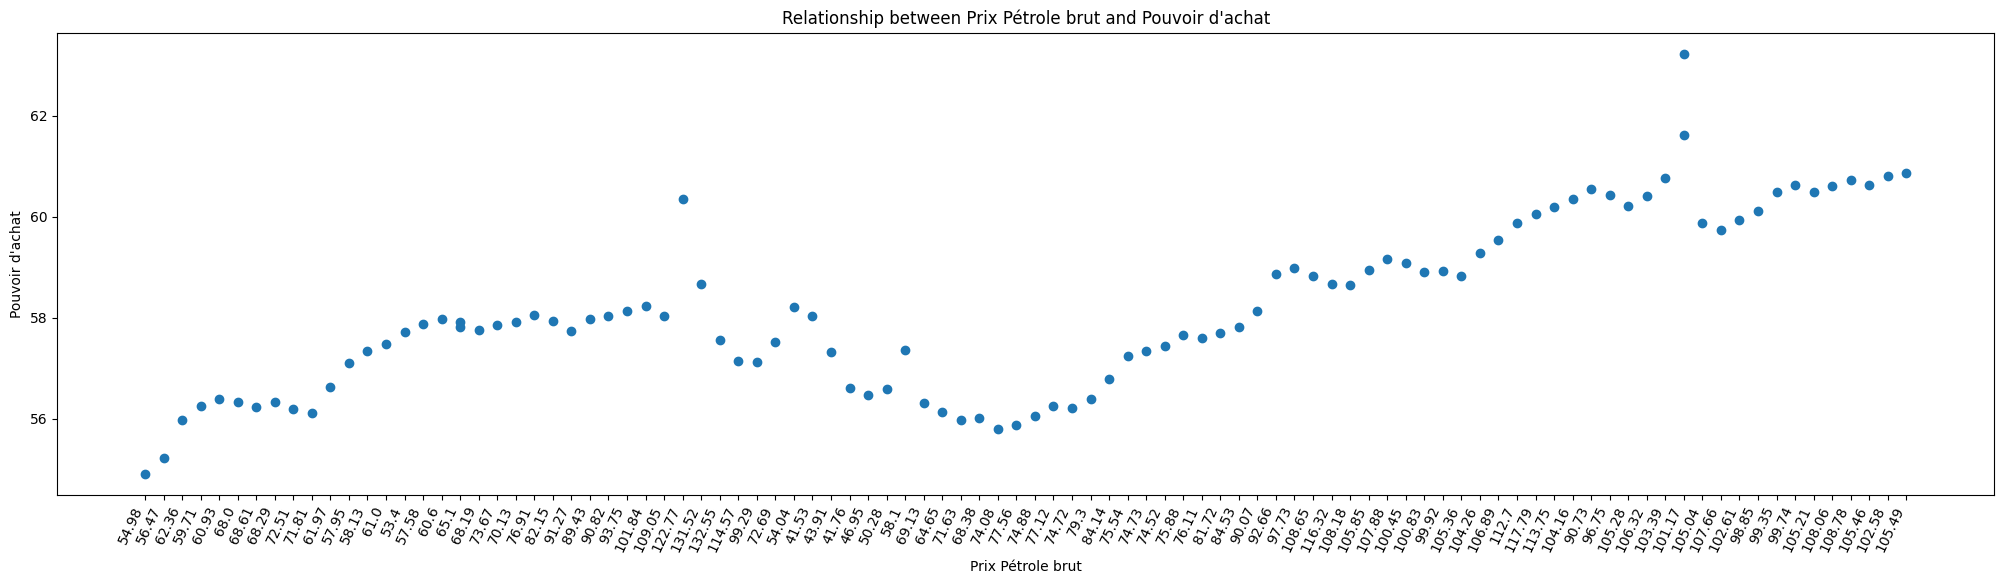

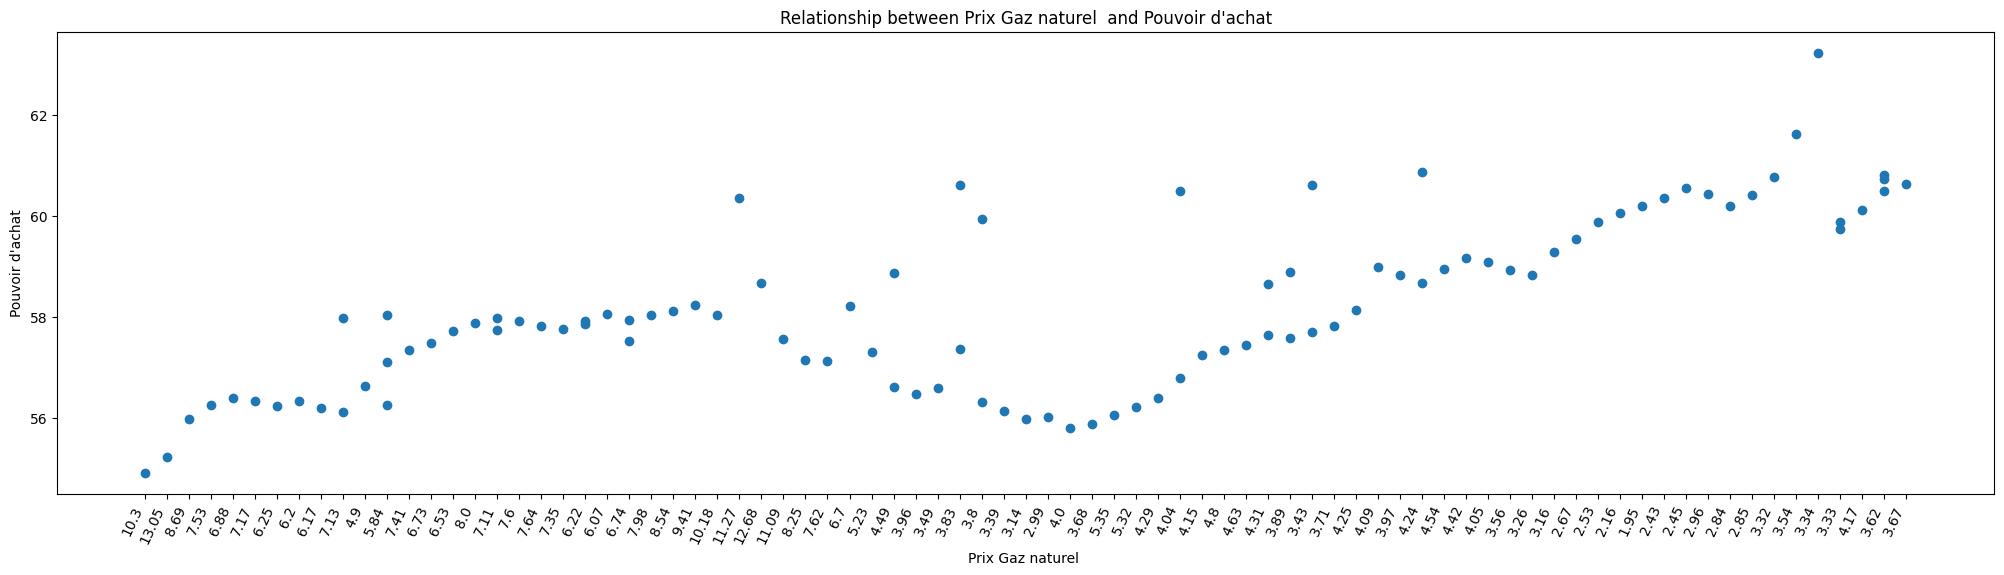

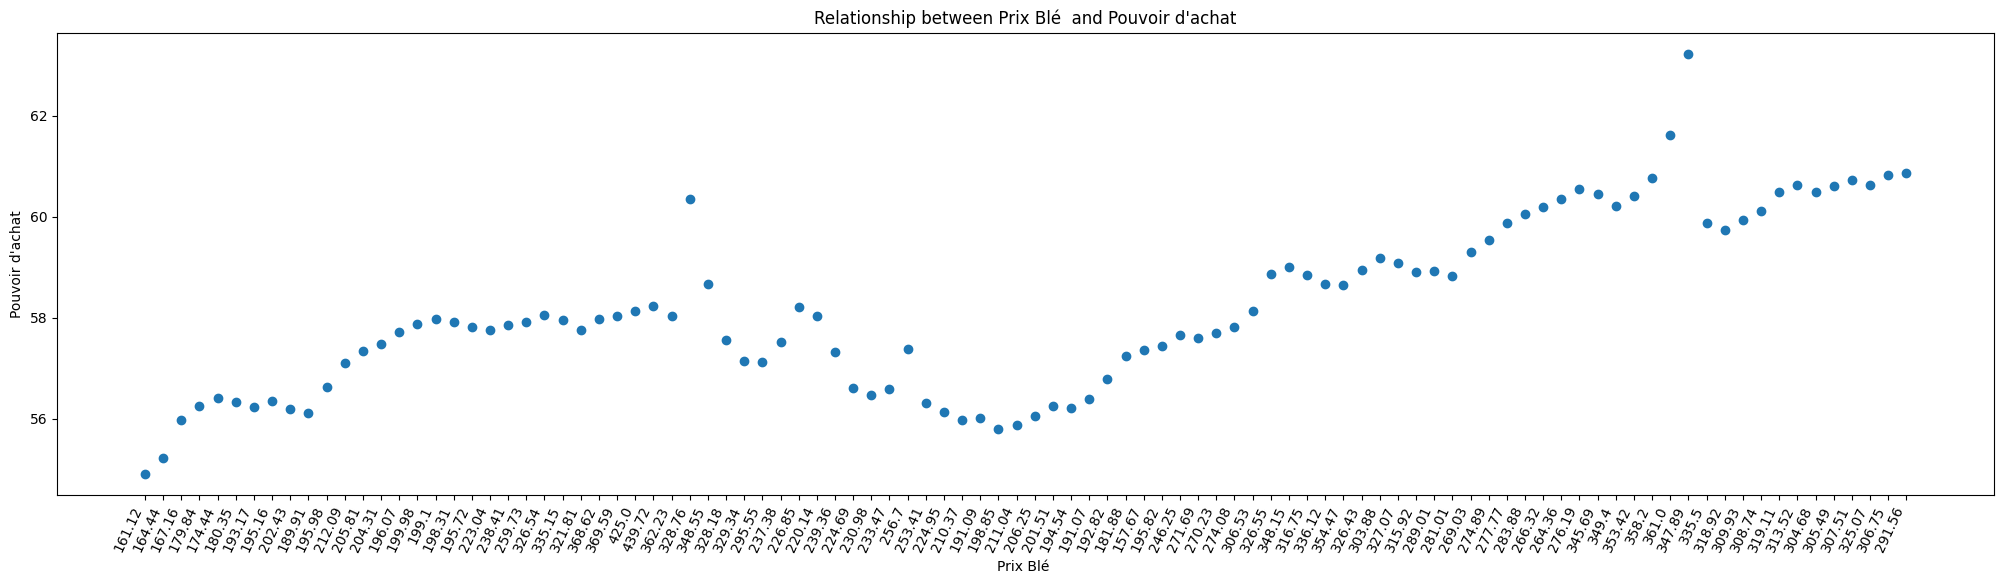

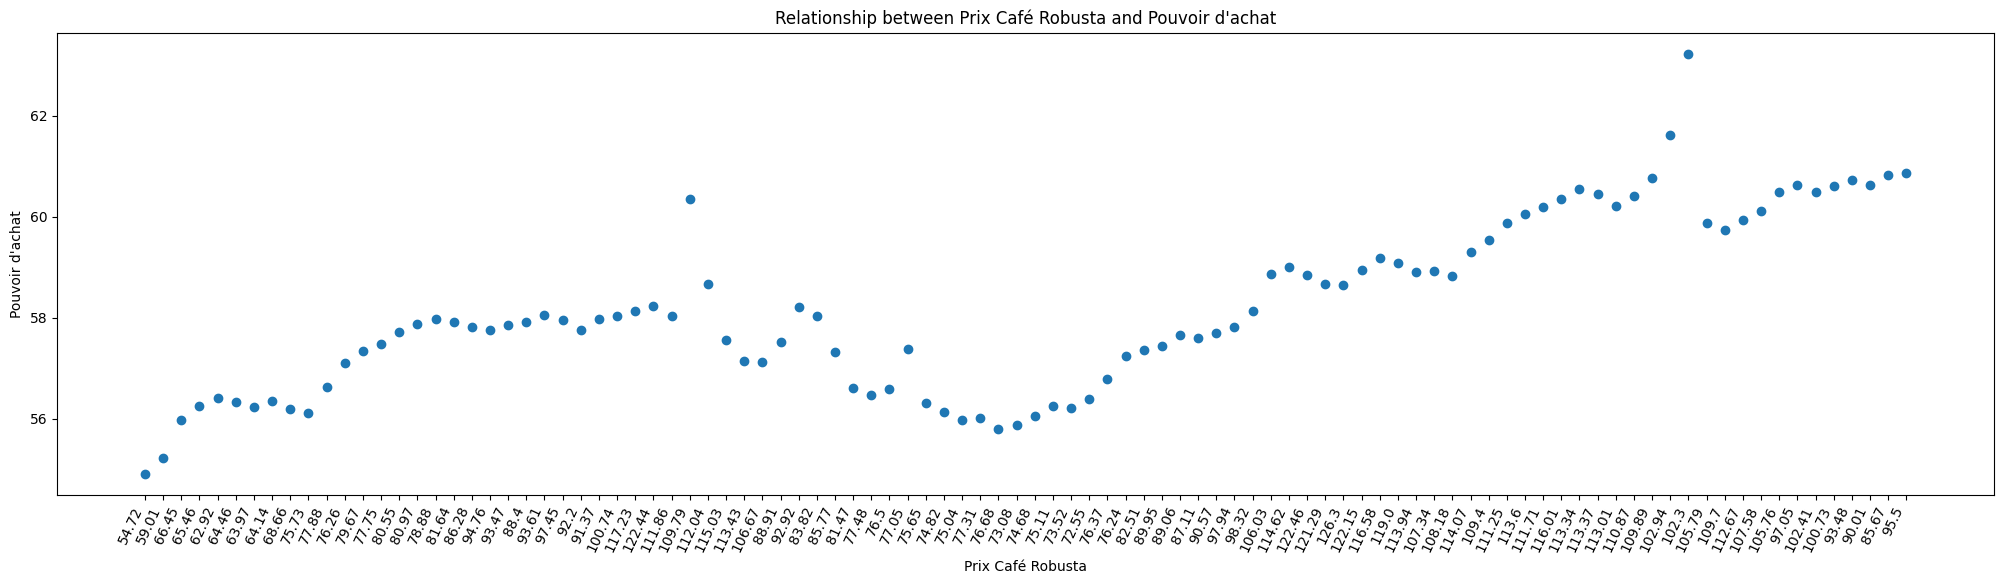

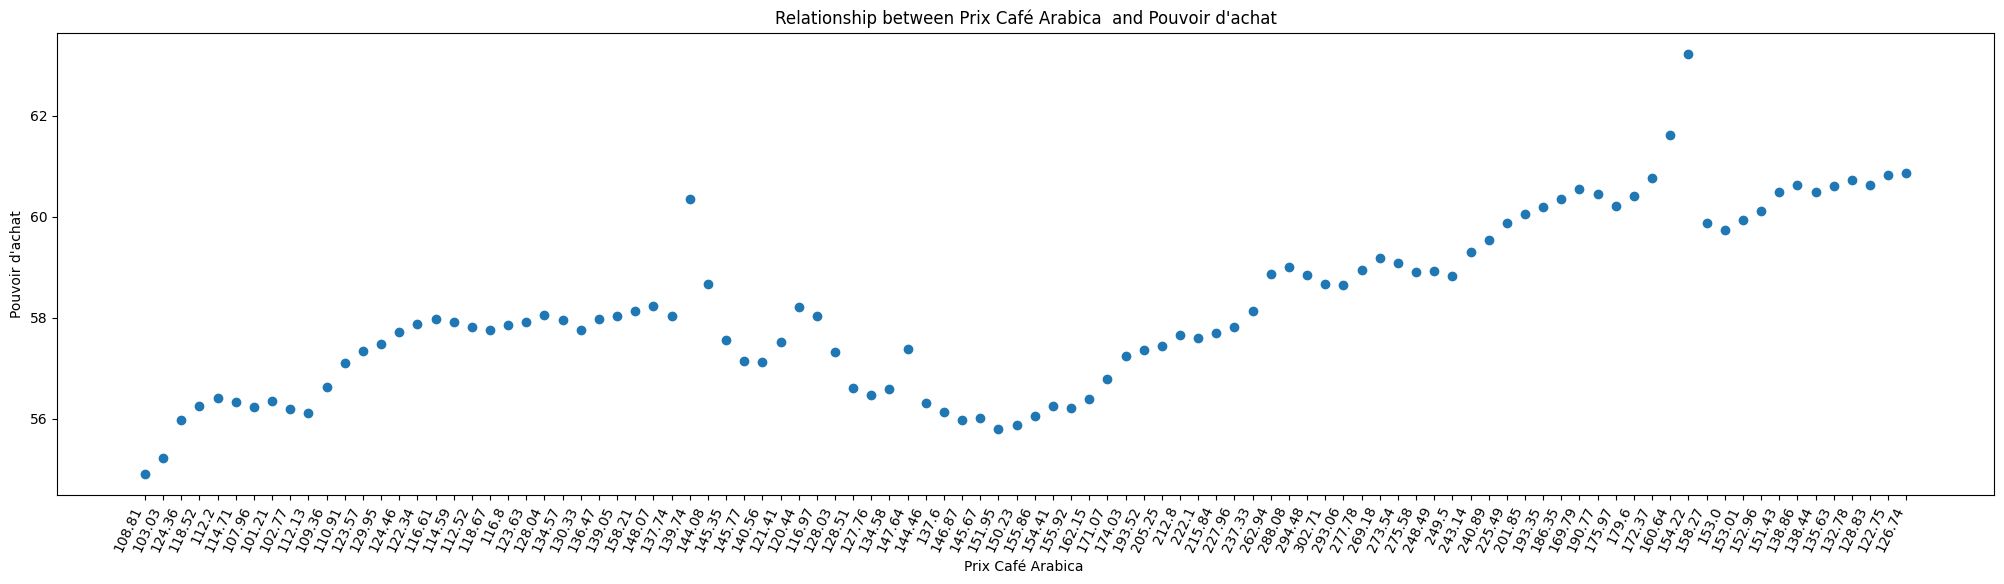

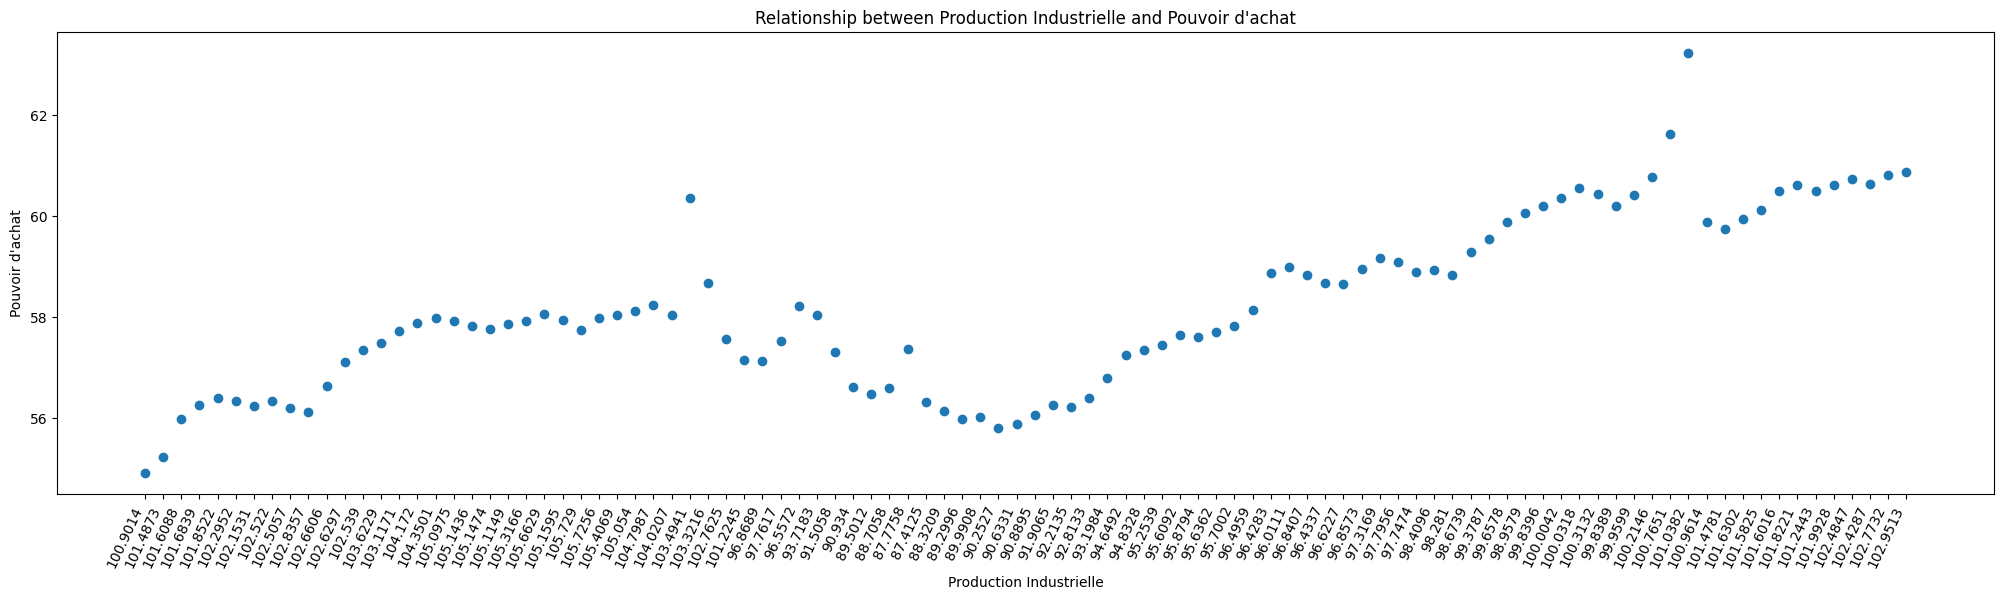

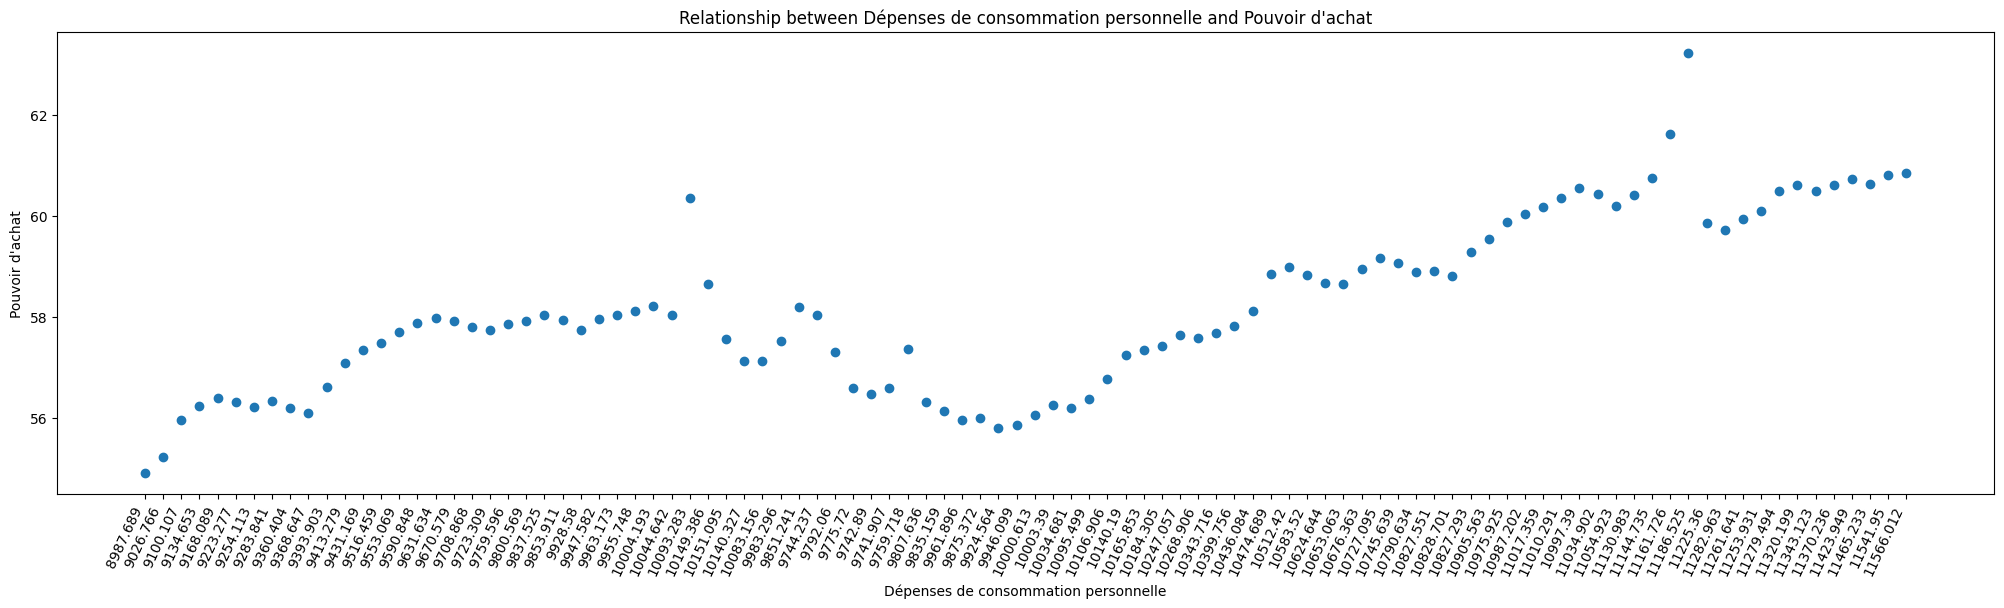

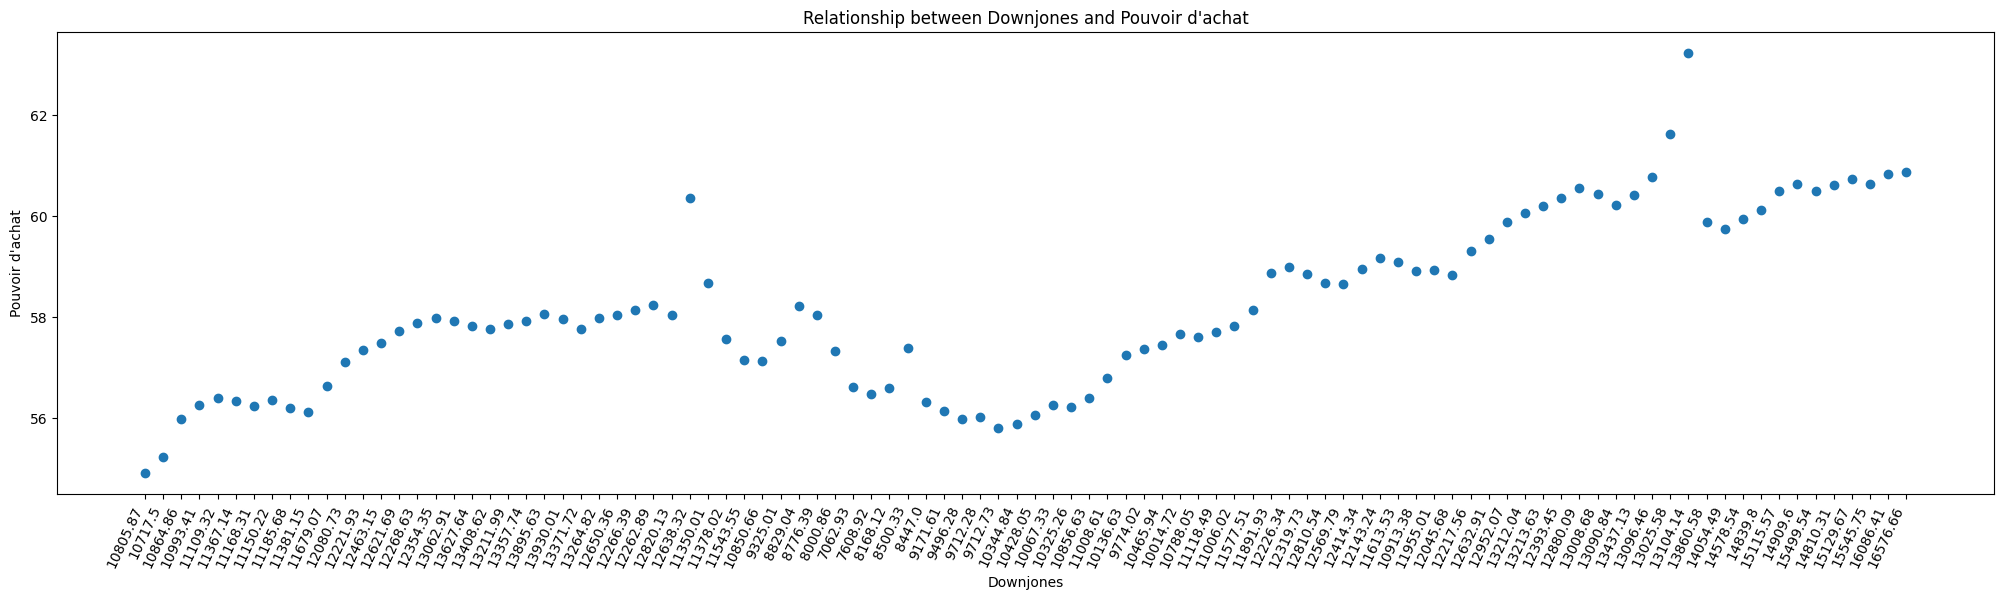

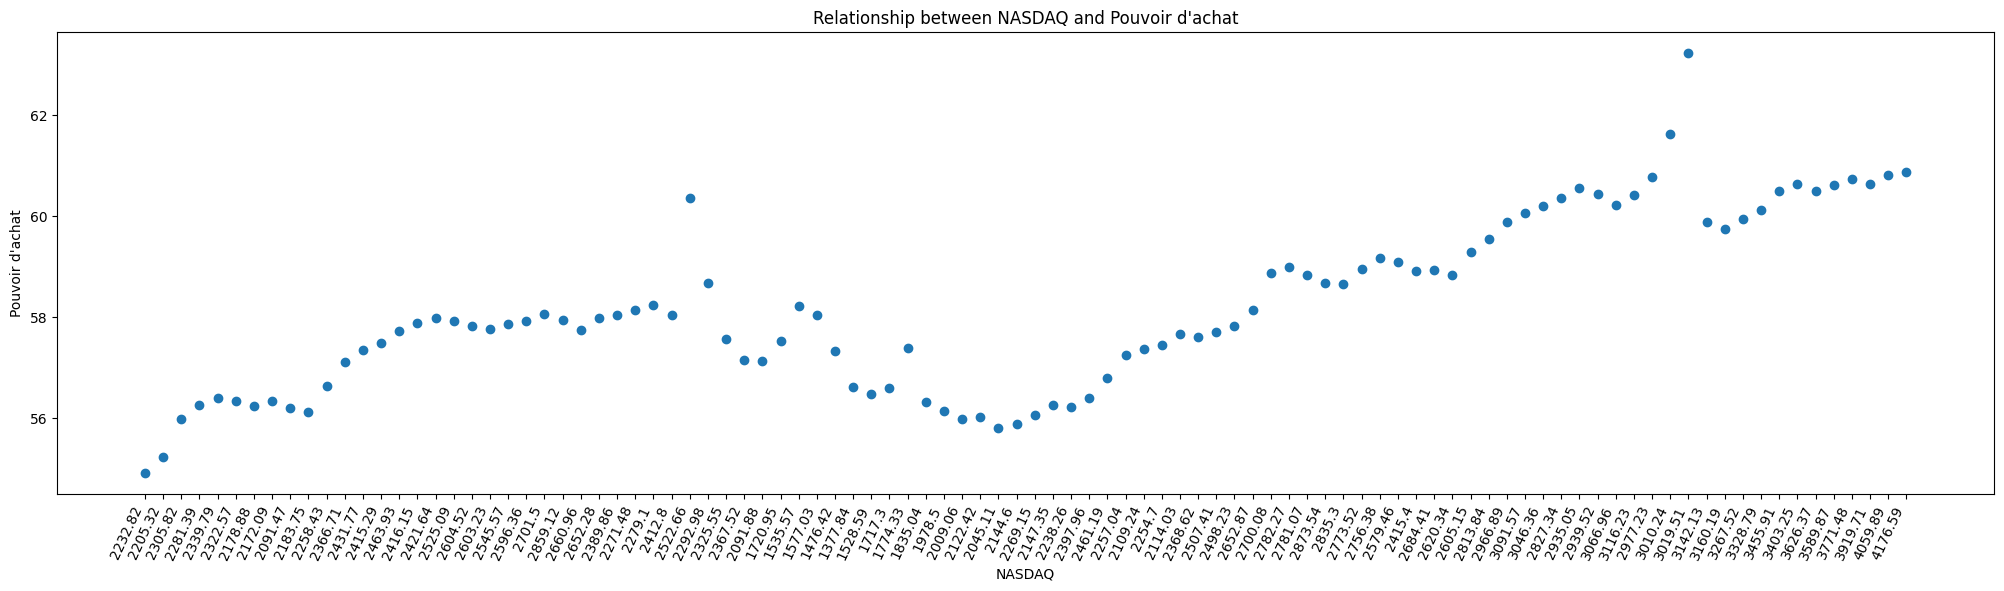

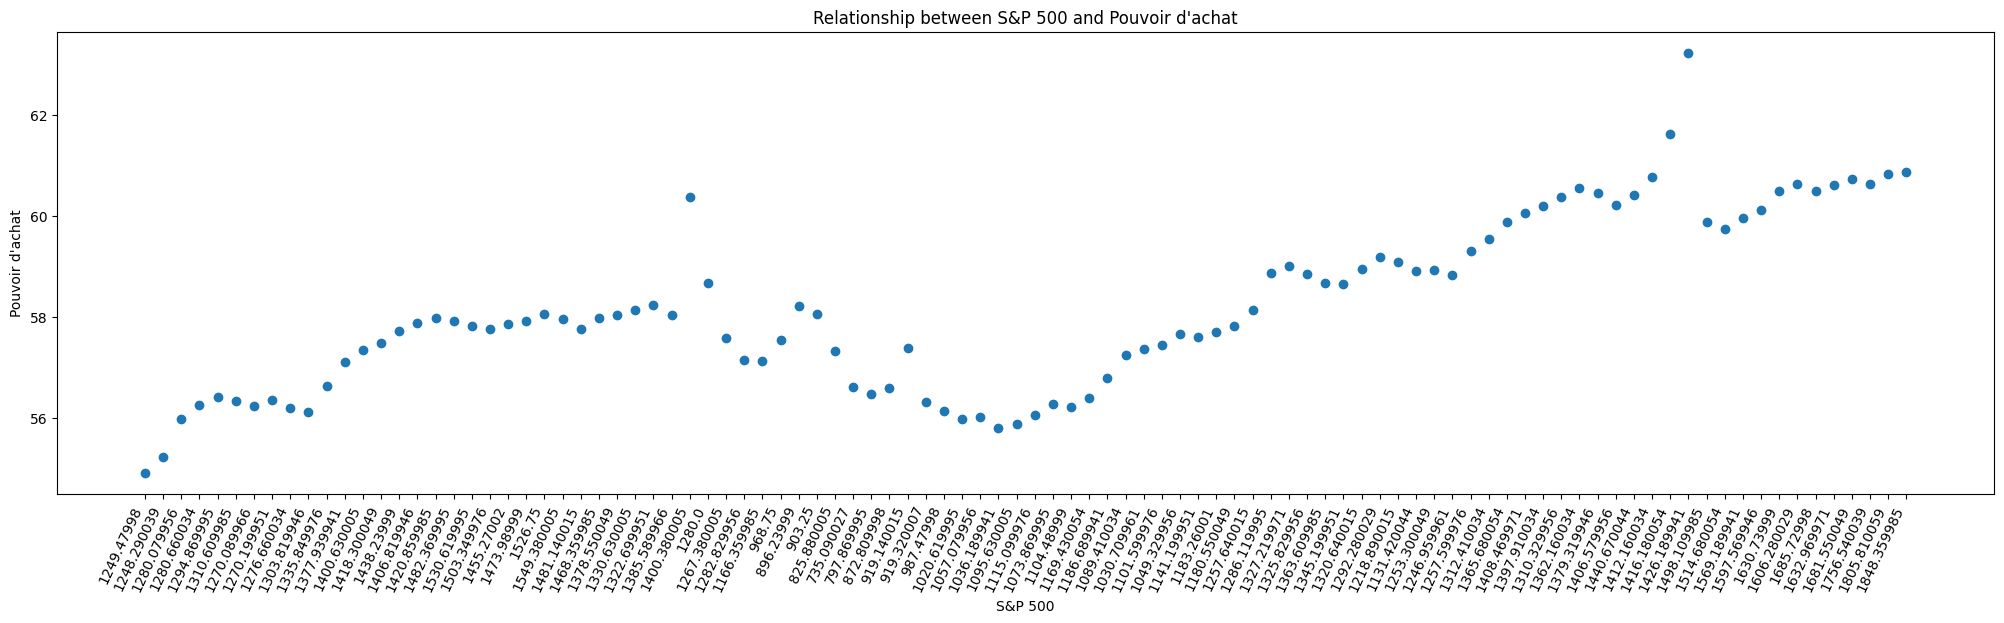

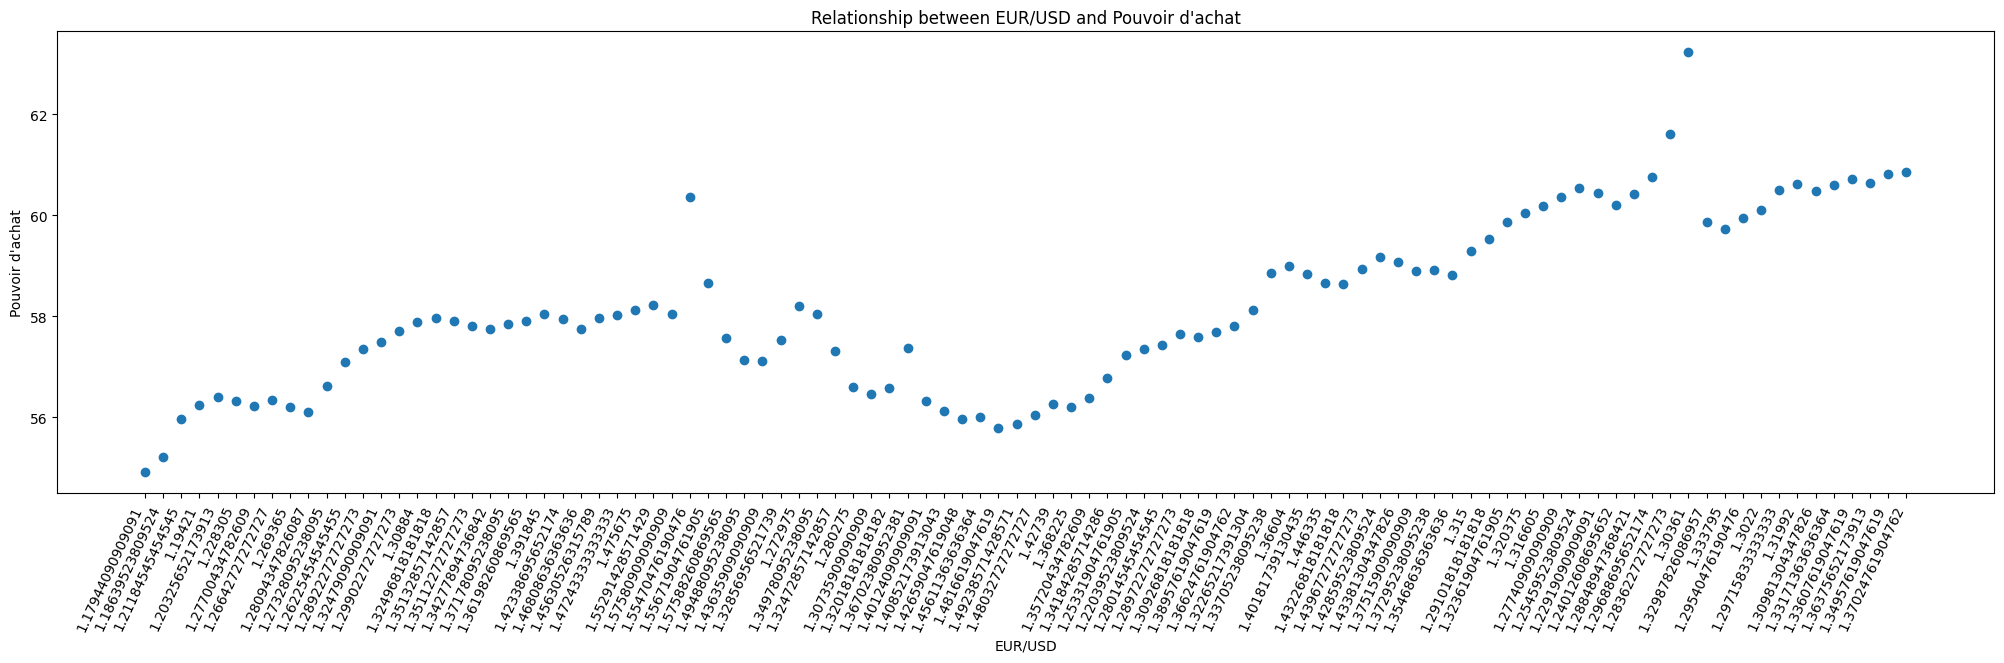

In [ ]:
for feature in features:
    plt.figure(figsize=(25, 6))
    plt.scatter(X[feature].astype(str), y)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"Relationship between {feature} and {target}")
    plt.xticks(rotation=65, ha='right')
    plt.show()

In [ ]:
data = data.dropna(subset=features + [target])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [ ]:
X_train['PrixArgent'] = pd.to_numeric(X_train['PrixArgent'], errors='coerce')
X_train['Prix Or'] = pd.to_numeric(X_train['Prix Or'], errors='coerce')

In [ ]:
X=data.drop(['Pouvoir d\'achat','Date'],axis=1)
X

,PrixArgent,Prix Or,Prix Pétrole brut,Prix Gaz naturel,Prix Blé,Prix Café Robusta,Prix Café Arabica,Réserve extérieur,Taux de chomage,Production Industrielle,Export,Import,Indice des prix à la consommation,revenu personnel,Dépenses de consommation personnelle,Downjones,NASDAQ,S&P 500,EUR/USD
0,786.38,476.67,54.98,10.30,161.12,54.72,108.81,68773,5.0,100.9014,107.6,112.3,198.100,10878.1,8987.689,10805.87,2232.82,1249.479980,1.179441
1,868.74,510.1,56.47,13.05,164.44,59.01,103.03,65127,4.9,101.4873,107.7,112.3,198.100,10939.9,9026.766,10717.50,2205.32,1248.290039,1.186395
2,918.48,549.86,62.36,8.69,167.16,66.45,124.36,65594,4.7,101.6088,108.5,113.7,199.300,11154.6,9100.107,10864.86,2305.82,1280.079956,1.211845
3,952.13,555,59.71,7.53,179.84,65.46,118.52,65364,4.8,101.6839,108.6,112.8,199.400,11216.5,9134.653,10993.41,2281.39,1280.660034,1.194210
4,1037.52,557.09,60.93,6.88,174.44,62.92,112.20,65354,4.7,101.8522,108.8,112.7,199.700,11263.0,9168.089,11109.32,2339.79,1294.869995,1.203257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2189.39,1351.74,108.06,3.43,305.49,100.73,135.63,145755,7.3,101.9928,131.9,139.4,233.249,14137.4,11370.236,14810.31,3589.87,1632.969971,1.331714
94,2256.38,1348.6,108.78,3.62,307.51,93.48,132.78,147747,7.3,102.4847,132.4,139.8,233.642,14188.9,11423.949,15129.67,3771.48,1681.550049,1.336076
95,2191.7,1316.58,105.46,3.67,325.07,90.01,128.83,147086,7.2,102.4287,131.6,138.9,233.799,14176.3,11465.233,15545.75,3919.71,1756.540039,1.363757
96,2075.76,1275.86,102.58,3.62,306.75,85.67,122.75,145112,6.9,102.7732,131.8,137.7,234.210,14243.8,11541.950,16086.41,4059.89,1805.810059,1.349576


In [ ]:
data = data.dropna(subset=features + [target])

## Model building

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2  = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2  = r2_score(y_test, y_lr_test_pred)
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.272839,0.908294,0.198808,0.878746


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [ ]:
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'random_state': [42]
}
rf_model = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

rf_random.fit(X_train, y_train)
print("Best Random Forest hyperparameterst:", rf_random.best_params_)
print("Best Random Forest score (RMSE):", np.sqrt(-rf_random.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Random Forest hyperparameterst: {'random_state': 42, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best Random Forest score (RMSE): 0.5760469031219421


In [ ]:
best_rf = rf_random.best_estimator_

y_rf_train_pred = best_rf.predict(X_train)
y_rf_test_pred = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.037936,0.987249,0.143307,0.912596


### xgboost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

xgb_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'random_state': [42]
}

xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

xgb_random.fit(X_train, y_train)
print("Best XGBoost hyperparameters:", xgb_random.best_params_)
print("Best XGBoost score (RMSE):", np.sqrt(-xgb_random.best_score_))
best_xgb = xgb_random.best_estimator_



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost hyperparameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'random_state': 42, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best XGBoost score (RMSE): 0.577387102223955


In [ ]:
y_xgb_train_pred = best_xgb.predict(X_train)
y_xgb_test_pred = best_xgb.predict(X_test)



xgb_train_mse = mean_squared_error(y_train, y_xgb_train_pred)
xgb_train_r2 = r2_score(y_train, y_xgb_train_pred)

xgb_test_mse = mean_squared_error(y_test, y_xgb_test_pred)
xgb_test_r2 = r2_score(y_test, y_xgb_test_pred)
xgb_results = pd.DataFrame(['XGBoost', xgb_train_mse, xgb_train_r2, xgb_test_mse, xgb_test_r2]).transpose()
xgb_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
xgb_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,XGBoost,0.052491,0.982357,0.208221,0.873005


# Comparison and Visualization

In [ ]:
results_df = pd.concat([lr_results, rf_results, xgb_results], ignore_index=True)
results_df

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.272839,0.908294,0.198808,0.878746
1,Random forest,0.037936,0.987249,0.143307,0.912596
2,XGBoost,0.052491,0.982357,0.208221,0.873005


Best model: Random forest
Best model Test R²: 0.9126


<Figure size 1000x600 with 0 Axes>

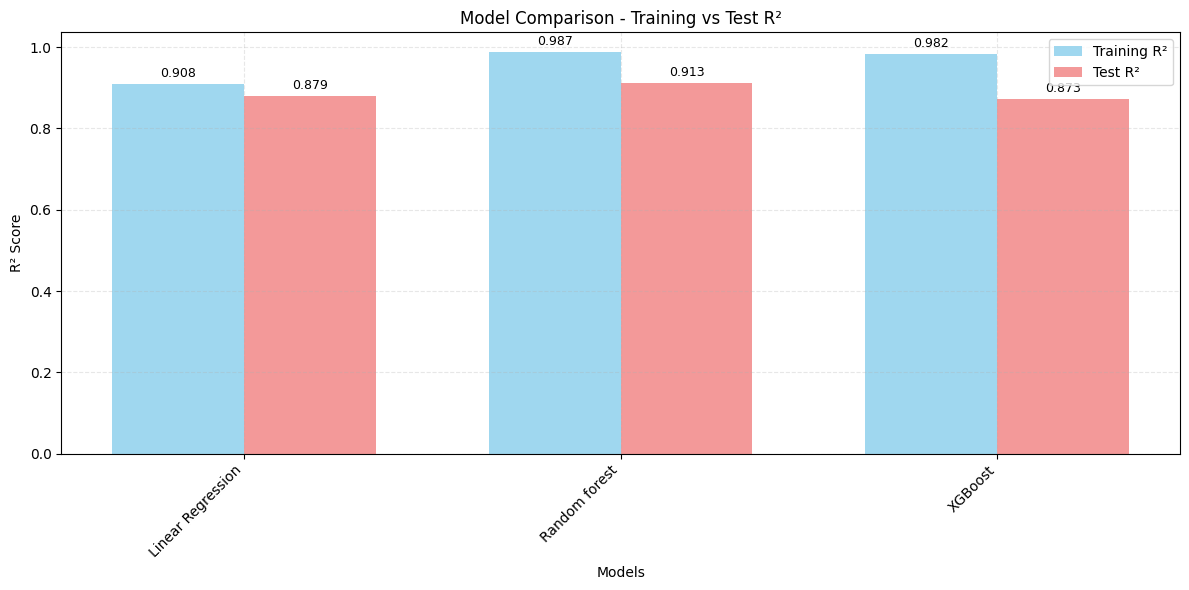

<Figure size 1000x600 with 0 Axes>

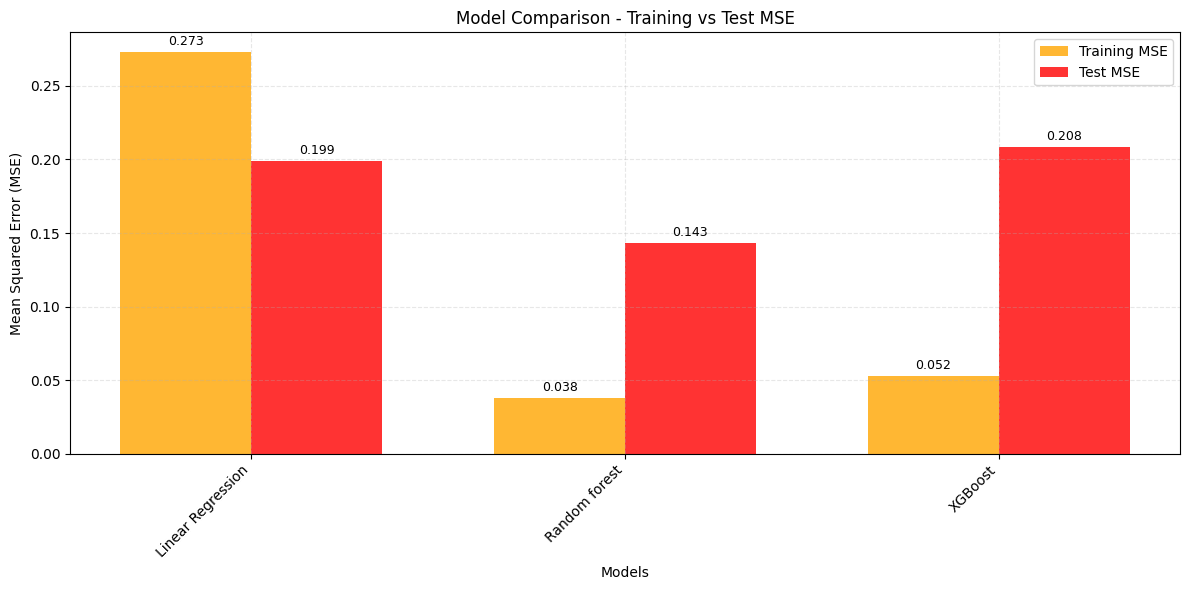

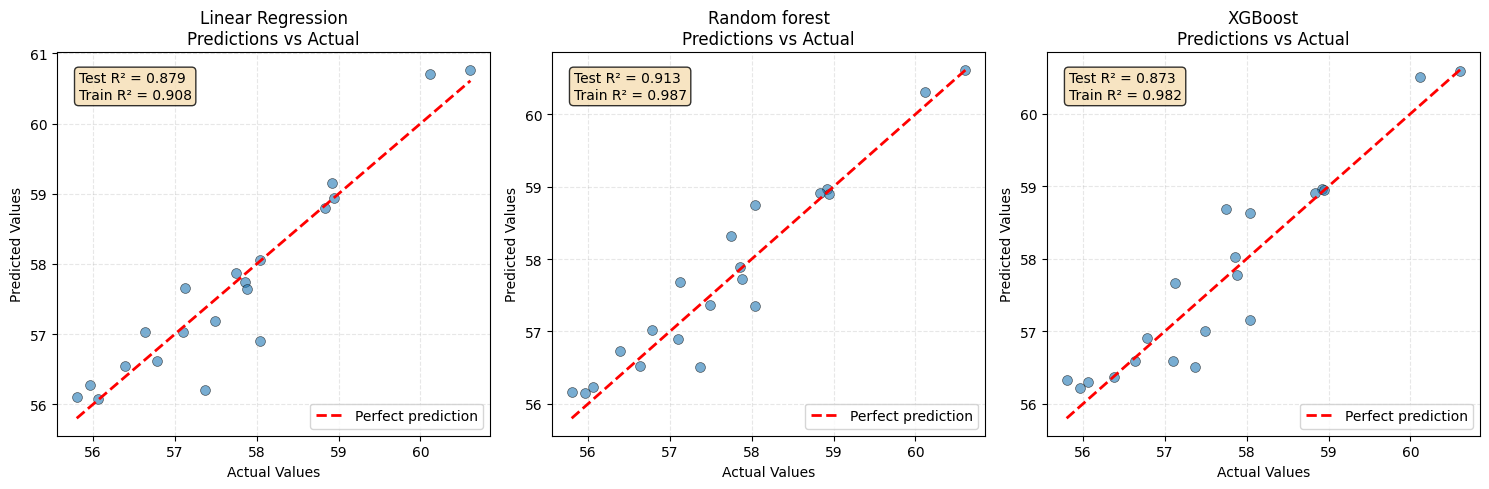

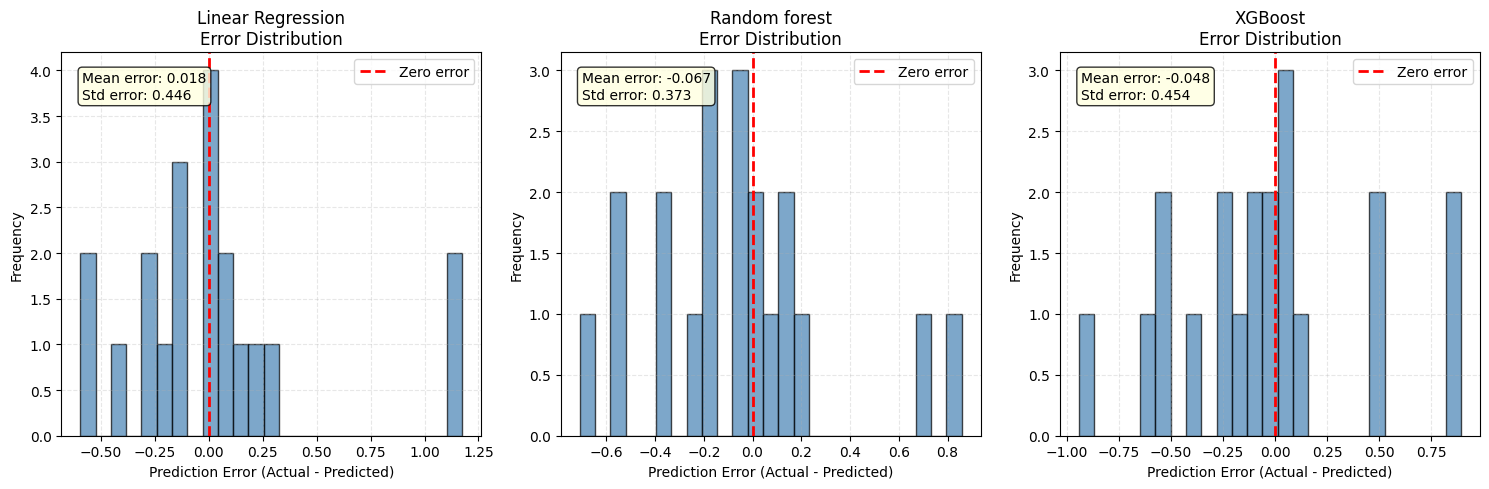

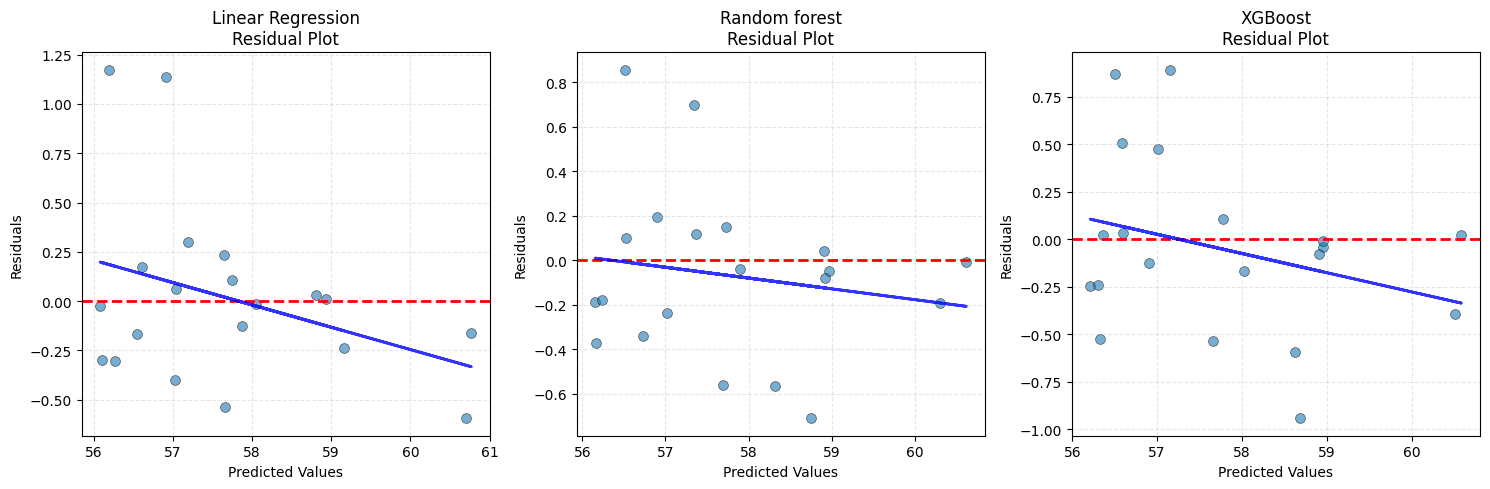


Performance Comparison Table:


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.272800,0.908300,0.198800,0.878700
1,Random forest,0.037900,0.987200,0.143300,0.912600
2,XGBoost,0.052500,0.982400,0.208200,0.873000


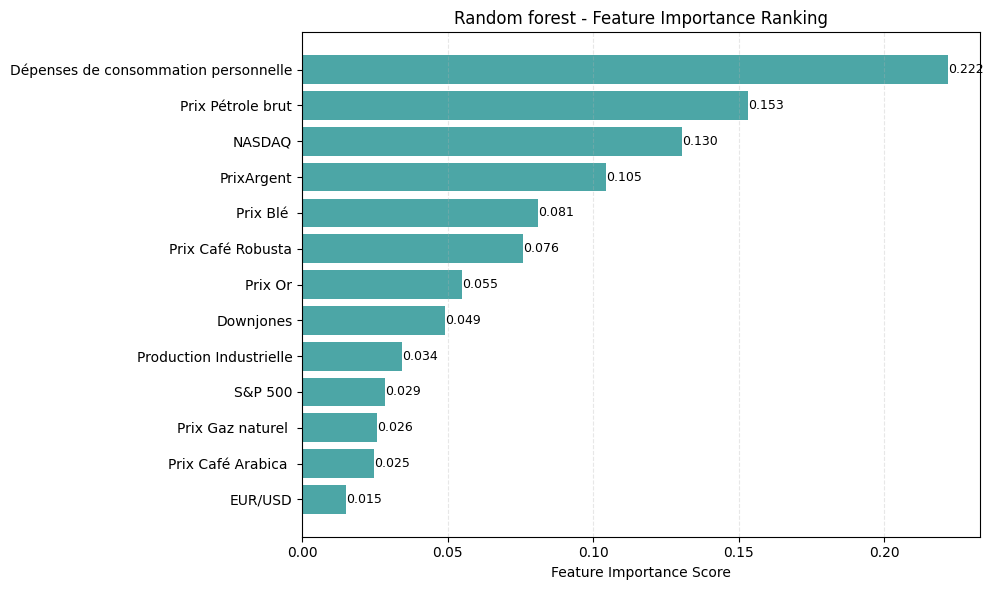


Random forest - Top 5 Most Important Features:


,Feature,Importance
8,Dépenses de consommation personnelle,0.2218
2,Prix Pétrole brut,0.1533
10,NASDAQ,0.1304
0,PrixArgent,0.1045
4,Prix Blé,0.0812


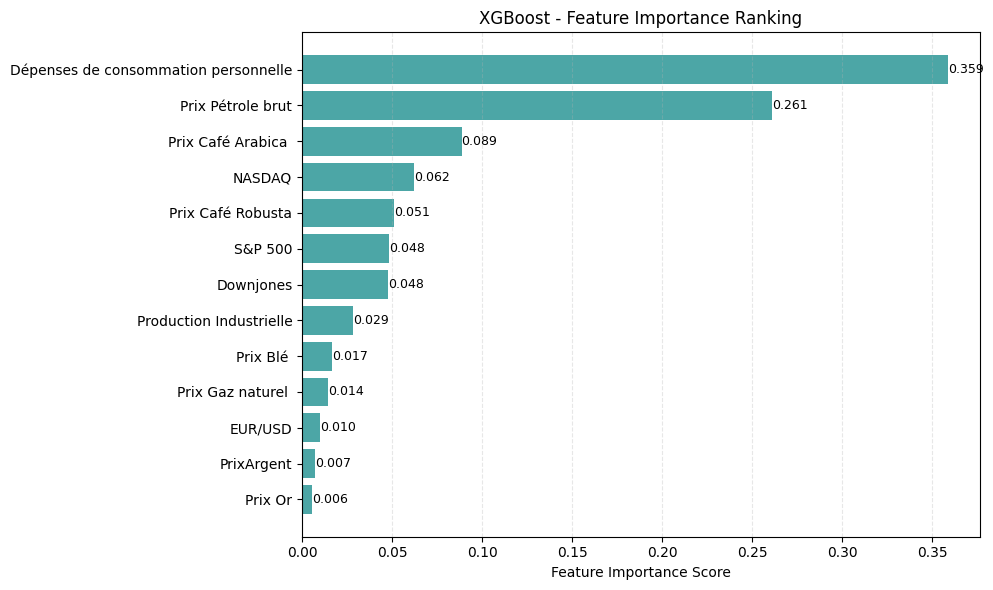


XGBoost - Top 5 Most Important Features:


,Feature,Importance
8,Dépenses de consommation personnelle,0.3587
2,Prix Pétrole brut,0.2611
6,Prix Café Arabica,0.0886
10,NASDAQ,0.0620
5,Prix Café Robusta,0.0510


In [ ]:
print(f"Best model: {best_model_name}")
print(f"Best model Test R²: {best_model_r2:.4f}")

# Visualization 1: R² comparison of all models
plt.figure(figsize=(10, 6))
models = results_df['Method']
test_r2 = results_df['Test R2'].astype(float)
train_r2 = results_df['Training R2'].astype(float)

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_r2, width, label='Training R²', alpha=0.8, color='skyblue')
rects2 = ax.bar(x + width/2, test_r2, width, label='Test R²', alpha=0.8, color='lightcoral')

ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('Model Comparison - Training vs Test R²')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, linestyle='--')

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Visualization 2: MSE comparison of all models
plt.figure(figsize=(10, 6))
test_mse = results_df['Test MSE'].astype(float)
train_mse = results_df['Training MSE'].astype(float)

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_mse, width, label='Training MSE', alpha=0.8, color='orange')
rects2 = ax.bar(x + width/2, test_mse, width, label='Test MSE', alpha=0.8, color='red')

ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Model Comparison - Training vs Test MSE')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, linestyle='--')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Visualization 3: Scatter plots for all 3 models - Predictions vs Actual values
plt.figure(figsize=(15, 5))

# Create predictions dictionary for easy access
predictions_dict = {
    'Linear Regression': (y_lr_test_pred, y_lr_train_pred),
    'Random forest': (y_rf_test_pred, y_rf_train_pred),
    'XGBoost': (y_xgb_test_pred, y_xgb_train_pred)
}

# Plot scatter plots for each model
for i, (model_name, (y_test_pred, y_train_pred)) in enumerate(predictions_dict.items(), 1):
    plt.subplot(1, 3, i)

    # Calculate metrics
    test_r2 = r2_score(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Scatter plot
    plt.scatter(y_test, y_test_pred, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

    # Perfect prediction line
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect prediction')

    # Add R² value
    plt.text(0.05, 0.95, f'Test R² = {test_r2:.3f}\nTrain R² = {train_r2:.3f}',
             transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}\nPredictions vs Actual')
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend()

plt.tight_layout()
plt.show()

# Visualization 4: Error distribution comparison
plt.figure(figsize=(15, 5))

for i, (model_name, (y_test_pred, y_train_pred)) in enumerate(predictions_dict.items(), 1):
    plt.subplot(1, 3, i)

    # Calculate errors
    errors = y_test.values - y_test_pred

    # Histogram of errors
    plt.hist(errors, bins=25, edgecolor='black', alpha=0.7, color='steelblue')

    # Add vertical line at zero
    plt.axvline(x=0, color='r', linestyle='--', lw=2, label='Zero error')

    # Add statistics
    mean_error = errors.mean()
    std_error = errors.std()

    plt.text(0.05, 0.95, f'Mean error: {mean_error:.3f}\nStd error: {std_error:.3f}',
             transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

    plt.xlabel('Prediction Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.title(f'{model_name}\nError Distribution')
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend()

plt.tight_layout()
plt.show()

# Visualization 5: Residual plots for all models
plt.figure(figsize=(15, 5))

for i, (model_name, (y_test_pred, y_train_pred)) in enumerate(predictions_dict.items(), 1):
    plt.subplot(1, 3, i)

    # Calculate residuals
    residuals = y_test.values - y_test_pred

    # Residual plot
    plt.scatter(y_test_pred, residuals, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

    # Horizontal line at zero
    plt.axhline(y=0, color='r', linestyle='--', lw=2)

    # Add trend line
    z = np.polyfit(y_test_pred, residuals, 1)
    p = np.poly1d(z)
    plt.plot(y_test_pred, p(y_test_pred), "b-", lw=2, alpha=0.8)

    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name}\nResidual Plot')
    plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Visualization 6: Performance summary table with highlighting
print("\nPerformance Comparison Table:")
comparison_df = results_df.copy()
comparison_df['Training MSE'] = comparison_df['Training MSE'].astype(float).round(4)
comparison_df['Training R2'] = comparison_df['Training R2'].astype(float).round(4)
comparison_df['Test MSE'] = comparison_df['Test MSE'].astype(float).round(4)
comparison_df['Test R2'] = comparison_df['Test R2'].astype(float).round(4)

# Highlight best model
def highlight_best(row):
    color = 'lightgreen' if row['Method'] == best_model_name else ''
    return ['background-color: {}'.format(color) for _ in row]

styled_df = comparison_df.style.apply(highlight_best, axis=1)\
    .set_caption('Model Performance Comparison (Green = Best Model)')

display(styled_df)

# Visualization 7: Feature importance for tree-based models
tree_models = {
    'Random forest': best_rf if 'Random forest' in predictions_dict else None,
    'XGBoost': best_xgb if 'XGBoost' in predictions_dict else None
}

# Plot feature importance for tree-based models
for model_name, model in tree_models.items():
    if model is not None and model_name != 'Linear Regression':
        plt.figure(figsize=(10, 6))

        if model_name == 'Random forest':
            importances = model.feature_importances_
        else:  # XGBoost
            importances = model.feature_importances_

        # Create feature importance dataframe
        feature_importance = pd.DataFrame({
            'Feature': features,
            'Importance': importances
        }).sort_values('Importance', ascending=True)

        # Horizontal bar plot
        bars = plt.barh(range(len(feature_importance)), feature_importance['Importance'],
                       align='center', color='teal', alpha=0.7)
        plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
        plt.xlabel('Feature Importance Score')
        plt.title(f'{model_name} - Feature Importance Ranking')
        plt.grid(True, alpha=0.3, linestyle='--', axis='x')

        # Add value labels
        for bar in bars:
            width = bar.get_width()
            plt.text(width, bar.get_y() + bar.get_height()/2,
                    f'{width:.3f}',
                    ha='left', va='center', fontsize=9)

        plt.tight_layout()
        plt.show()

        print(f"\n{model_name} - Top 5 Most Important Features:")
        display(feature_importance.nlargest(5, 'Importance').round(4))

# Save models

In [ ]:
import joblib

joblib.dump(lr, 'linear_regression_model.joblib')
joblib.dump(best_rf, 'random_forest_model.joblib')
joblib.dump(best_xgb, 'xgboost_model.joblib')

metadata = {
    'features': features,
    'feature_columns': list(X.columns),
    'target': "Pouvoir d'achat",
    'best_model': best_model_name,
    'results': results_df.to_dict()
}

joblib.dump(metadata, 'model_metadata.joblib')

['model_metadata.joblib']

# SHAP analysis

ADVANCED SHAP ANALYSIS FOR MODEL INTERPRETATION

1. INITIALIZING SHAP EXPLAINERS...
Random Forest expected value: 58.3183
XGBoost expected value: 58.3176
Average actual target value: 57.6847

2. GLOBAL FEATURE IMPORTANCE ANALYSIS

Random Forest - Top 10 Features:
1. Dépenses de consommation personnelle: 0.3476
2. Prix Pétrole brut: 0.2682
3. Prix Café Robusta: 0.1979
4. PrixArgent: 0.1789
5. NASDAQ: 0.1643
6. Prix Blé : 0.1387
7. Downjones: 0.1077
8. Production Industrielle: 0.1067
9. Prix Or: 0.0895
10. S&P 500: 0.0714

XGBoost - Top 10 Features:
1. Dépenses de consommation personnelle: 0.6991
2. Prix Café Robusta: 0.2941
3. Prix Pétrole brut: 0.2578
4. NASDAQ: 0.1660
5. Downjones: 0.1089
6. Production Industrielle: 0.1035
7. Prix Blé : 0.0806
8. PrixArgent: 0.0597
9. Prix Café Arabica : 0.0509
10. S&P 500: 0.0419

3. SHAP SUMMARY PLOTS


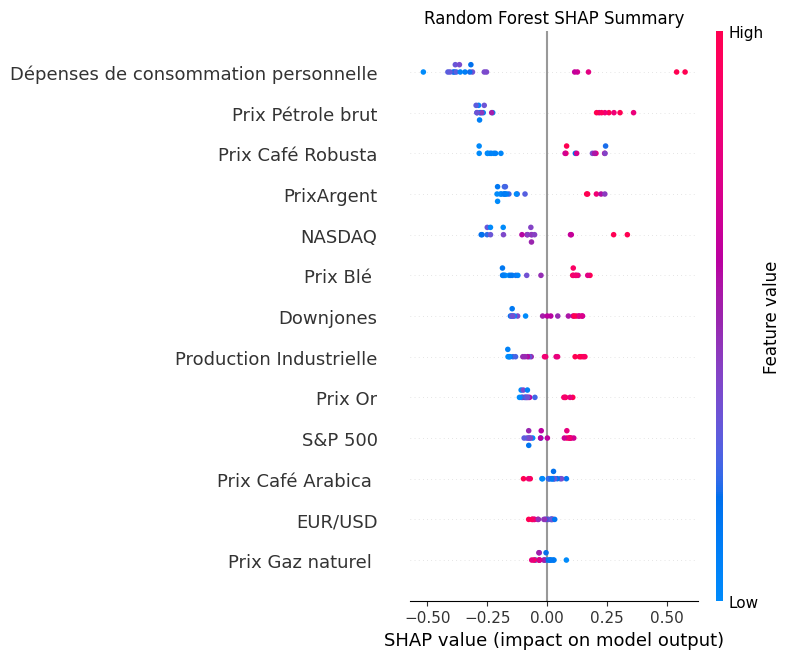

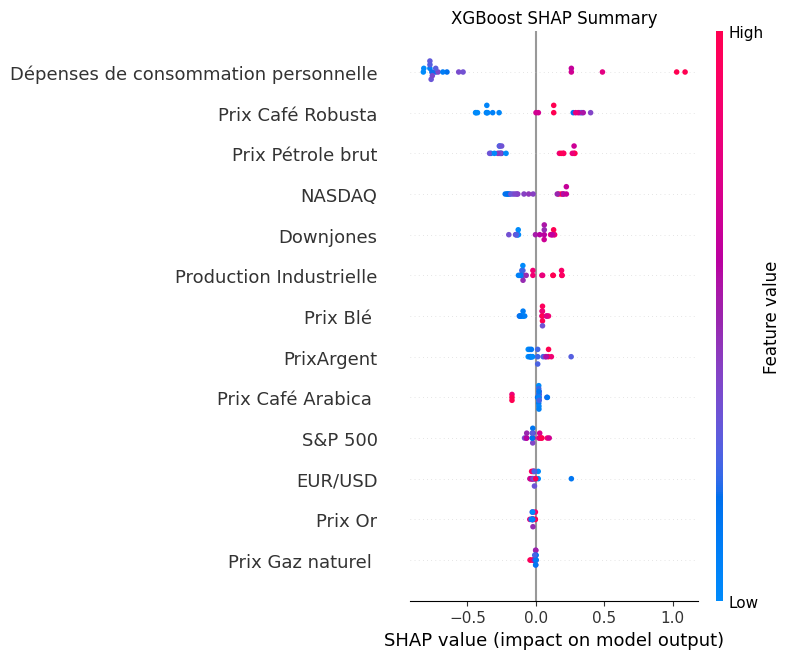


4. FEATURE IMPACT DIRECTION ANALYSIS

Random Forest:
  • Dépenses de consommation personnelle
    - Mean SHAP: -0.1946 (decreases predictions strongly)
    - Positive impact: 25.0%
    - Negative impact: 75.0%
  • Prix Pétrole brut
    - Mean SHAP: -0.0591 (decreases predictions strongly)
    - Positive impact: 40.0%
    - Negative impact: 60.0%
  • Prix Café Robusta
    - Mean SHAP: -0.0189 (decreases predictions moderately)
    - Positive impact: 55.0%
    - Negative impact: 45.0%
  • PrixArgent
    - Mean SHAP: -0.0784 (decreases predictions strongly)
    - Positive impact: 25.0%
    - Negative impact: 75.0%
  • NASDAQ
    - Mean SHAP: -0.0833 (decreases predictions strongly)
    - Positive impact: 20.0%
    - Negative impact: 80.0%

XGBoost:
  • Dépenses de consommation personnelle
    - Mean SHAP: -0.3861 (decreases predictions strongly)
    - Positive impact: 25.0%
    - Negative impact: 75.0%
  • Prix Café Robusta
    - Mean SHAP: -0.0375 (decreases predictions moderately)
    

In [ ]:
import shap
import json

print("="*70)
print("ADVANCED SHAP ANALYSIS FOR MODEL INTERPRETATION")
print("="*70)

# 1. INITIALIZE SHAP EXPLAINERS
print("\n1. INITIALIZING SHAP EXPLAINERS...")

rf_explainer = shap.TreeExplainer(best_rf)
xgb_explainer = shap.TreeExplainer(best_xgb)

rf_shap_values = rf_explainer.shap_values(X_test)
xgb_shap_values = xgb_explainer.shap_values(X_test)

rf_expected_value = rf_explainer.expected_value
xgb_expected_value = xgb_explainer.expected_value

# Handle expected value format
if isinstance(rf_expected_value, np.ndarray):
    rf_expected_value = rf_expected_value[0]
if isinstance(xgb_expected_value, np.ndarray):
    xgb_expected_value = xgb_expected_value[0]

print(f"Random Forest expected value: {rf_expected_value:.4f}")
print(f"XGBoost expected value: {xgb_expected_value:.4f}")
print(f"Average actual target value: {y_test.mean():.4f}")

# 2. GLOBAL FEATURE IMPORTANCE
print("\n" + "="*70)
print("2. GLOBAL FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# ---------- RF SHAP formatting ----------
if isinstance(rf_shap_values, list):
    rf_shap_array = rf_shap_values[0]
else:
    rf_shap_array = rf_shap_values

rf_shap_importance = np.abs(rf_shap_array).mean(axis=0)

# ---------- XGB SHAP formatting ----------
if isinstance(xgb_shap_values, list):
    xgb_shap_array = xgb_shap_values[0]
else:
    xgb_shap_array = xgb_shap_values

xgb_shap_importance = np.abs(xgb_shap_array).mean(axis=0)

# ---------- DataFrames ----------
rf_importance_df = pd.DataFrame({
    "Feature": features,
    "SHAP_Importance": rf_shap_importance
}).sort_values(by="SHAP_Importance", ascending=False)

xgb_importance_df = pd.DataFrame({
    "Feature": features,
    "SHAP_Importance": xgb_shap_importance
}).sort_values(by="SHAP_Importance", ascending=False)

# ---------- Print Top 10 ----------
print("\nRandom Forest - Top 10 Features:")
for i, row in enumerate(rf_importance_df.head(10).itertuples(), 1):
    print(f"{i}. {row.Feature}: {row.SHAP_Importance:.4f}")

print("\nXGBoost - Top 10 Features:")
for i, row in enumerate(xgb_importance_df.head(10).itertuples(), 1):
    print(f"{i}. {row.Feature}: {row.SHAP_Importance:.4f}")

# 3. SHAP SUMMARY PLOTS
print("\n" + "="*70)
print("3. SHAP SUMMARY PLOTS")
print("="*70)

plt.figure(figsize=(12, 8))
shap.summary_plot(rf_shap_array, X_test, feature_names=features, show=False)
plt.title("Random Forest SHAP Summary")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
shap.summary_plot(xgb_shap_array, X_test, feature_names=features, show=False)
plt.title("XGBoost SHAP Summary")
plt.tight_layout()
plt.show()

# 4. FEATURE IMPACT DIRECTION
print("\n" + "="*70)
print("4. FEATURE IMPACT DIRECTION ANALYSIS")
print("="*70)

def analyze_feature_direction(shap_vals, importance_df, model_name):
    print(f"\n{model_name}:")
    for feature in importance_df.head(5)["Feature"]:
        idx = features.index(feature)
        vals = shap_vals[:, idx]

        mean_val = vals.mean()
        pos = np.mean(vals > 0) * 100
        neg = np.mean(vals < 0) * 100

        direction = "increases" if mean_val > 0 else "decreases"
        strength = "strongly" if abs(mean_val) > 0.05 else "moderately"

        print(f"  • {feature}")
        print(f"    - Mean SHAP: {mean_val:.4f} ({direction} predictions {strength})")
        print(f"    - Positive impact: {pos:.1f}%")
        print(f"    - Negative impact: {neg:.1f}%")

analyze_feature_direction(rf_shap_array, rf_importance_df, "Random Forest")
analyze_feature_direction(xgb_shap_array, xgb_importance_df, "XGBoost")

# 5. INDIVIDUAL PREDICTION EXPLANATIONS

print("\n" + "="*70)
print("5. INDIVIDUAL PREDICTION BREAKDOWN")
print("="*70)

n_samples = len(X_test)
sample_indices = np.linspace(0, n_samples - 1, num=min(3, n_samples), dtype=int)

for idx in sample_indices:
    actual = y_test.iloc[idx]
    rf_pred = best_rf.predict(X_test.iloc[[idx]])[0]
    xgb_pred = best_xgb.predict(X_test.iloc[[idx]])[0]

    print(f"\nObservation {idx}:")
    print(f"Actual value: {actual:.4f}")
    print(f"RF prediction: {rf_pred:.4f}")
    print(f"XGB prediction: {xgb_pred:.4f}")

    for model_name, shap_vals in [
        ("Random Forest", rf_shap_array[idx]),
        ("XGBoost", xgb_shap_array[idx])
    ]:
        print(f"\n{model_name} top contributions:")
        contributions = list(zip(features, shap_vals))
        contributions.sort(key=lambda x: abs(x[1]), reverse=True)

        for feat, val in contributions[:5]:
            direction = "increased" if val > 0 else "decreased"
            print(f"  • {feat}: {val:.4f} ({direction})")

# 6. SAVE RESULTS
print("\n" + "="*70)
print("6. SAVING RESULTS")
print("="*70)

rf_importance_df.to_csv("rf_feature_importance.csv", index=False)
xgb_importance_df.to_csv("xgb_feature_importance.csv", index=False)

np.save("rf_shap_values.npy", rf_shap_array)
np.save("xgb_shap_values.npy", xgb_shap_array)

summary = {
    "date": pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"),
    "best_model": best_model_name,
    "rf_expected_value": float(rf_expected_value),
    "xgb_expected_value": float(xgb_expected_value),
    "top_rf_features": rf_importance_df.head(5).to_dict("records"),
    "top_xgb_features": xgb_importance_df.head(5).to_dict("records")
}

with open("shap_summary.json", "w") as f:
    json.dump(summary, f, indent=4)

print("✔ All SHAP analysis files saved successfully")
print("="*70)
print("SHAP ANALYSIS COMPLETED")
print("="*70)
